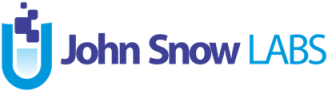

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/Fiqa_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [1]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [3]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## Fiqa
[Fiqa](https://huggingface.co/datasets/explodinggradients/fiqa)

**Dataset Summary**

The Fiqa dataset which is curated from `explodinggradients/fiqa` huggingface dataset.

**Data Splits**

- `test` :	Testing set from the Fiqa dataset, containing 648 question and answer examples.

### Setup and Configure Harness

In [4]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Fiqa",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [6]:
harness.data = harness.data[:20]

### Generating the test cases.

In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'dyslexia_word_swap': 9 samples removed out of 20
[W010] - Test 'add_abbreviation': 8 samples removed out of 20
[W010] - Test 'add_slangs': 13 samples removed out of 20
[W010] - Test 'add_speech_to_text_typo': 6 samples removed out of 20



In [8]:
harness.testcases()

,category,test_type,original_question,perturbed_question
0,robustness,uppercase,How to deposit a cheque issued to an associate...,HOW TO DEPOSIT A CHEQUE ISSUED TO AN ASSOCIATE...
1,robustness,uppercase,Can I send a money order from USPS as a business?,CAN I SEND A MONEY ORDER FROM USPS AS A BUSINESS?
2,robustness,uppercase,1 EIN doing business under multiple business n...,1 EIN DOING BUSINESS UNDER MULTIPLE BUSINESS N...
3,robustness,uppercase,Applying for and receiving business credit,APPLYING FOR AND RECEIVING BUSINESS CREDIT
4,robustness,uppercase,401k Transfer After Business Closure,401K TRANSFER AFTER BUSINESS CLOSURE
...,...,...,...,...
59,robustness,add_speech_to_text_typo,How to account for money earned and spent prio...,Hau to account for money earned and spent prio...
60,robustness,add_speech_to_text_typo,Do I need a new EIN since I am hiring employee...,Do I. need a new EIN since I am hiring employe...
61,robustness,add_speech_to_text_typo,Have plenty of cash flow but bad credit,Halve plenty of cash flow but bad credit
62,robustness,add_speech_to_text_typo,financial institution wants share member break...,financial institution wants Cher member break ...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [9]:
harness.run()

Running testcases... : 100%|██████████| 64/64 [03:32<00:00,  3.32s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [10]:
harness.generated_results()

,category,test_type,original_question,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,How to deposit a cheque issued to an associate...,HOW TO DEPOSIT A CHEQUE ISSUED TO AN ASSOCIATE...,\nTo deposit a cheque issued to an associate i...,\n Depositing a cheque issued to an associa...,False
1,robustness,uppercase,Can I send a money order from USPS as a business?,CAN I SEND A MONEY ORDER FROM USPS AS A BUSINESS?,"\nYes, you can send a money order from USPS as...","\nYes, you can send a money order from USPS as...",True
2,robustness,uppercase,1 EIN doing business under multiple business n...,1 EIN DOING BUSINESS UNDER MULTIPLE BUSINESS N...,\n If you are operating multiple business n...,\n If you are doing business under multiple...,False
3,robustness,uppercase,Applying for and receiving business credit,APPLYING FOR AND RECEIVING BUSINESS CREDIT,\nApplying for and receiving business credit c...,\n Applying for and receiving business cred...,True
4,robustness,uppercase,401k Transfer After Business Closure,401K TRANSFER AFTER BUSINESS CLOSURE,\nIf your business has closed and you are cons...,\nIf you have a 401K plan through your employe...,True
...,...,...,...,...,...,...,...
59,robustness,add_speech_to_text_typo,How to account for money earned and spent prio...,Hau to account for money earned and spent prio...,"\nWhen establishing a business, it is importan...",\nPrior to establishing business bank accounts...,True
60,robustness,add_speech_to_text_typo,Do I need a new EIN since I am hiring employee...,Do I. need a new EIN since I am hiring employe...,"\nYes, you will need to obtain a new Employer ...","\nYes, you will need to obtain a new Employer ...",True
61,robustness,add_speech_to_text_typo,Have plenty of cash flow but bad credit,Halve plenty of cash flow but bad credit,\nIf you have plenty of cash flow but bad cred...,\nIf you have plenty of cash flow but bad cred...,True
62,robustness,add_speech_to_text_typo,financial institution wants share member break...,financial institution wants Cher member break ...,\nA single-member LLC is a limited liability c...,\nA single member LLC is a limited liability c...,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,3,17,85%,66%,True
1,robustness,dyslexia_word_swap,3,8,73%,60%,True
2,robustness,add_abbreviation,5,7,58%,60%,False
3,robustness,add_slangs,4,3,43%,60%,False
4,robustness,add_speech_to_text_typo,3,11,79%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [12]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Fiqa",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [13]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1000.55it/s]


In [15]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rouge2_score,male
4,fairness,min_gender_rouge2_score,female
5,fairness,min_gender_rouge2_score,unknown
6,fairness,min_gender_rougeL_score,male
7,fairness,min_gender_rougeL_score,female
8,fairness,min_gender_rougeL_score,unknown
9,fairness,min_gender_rougeLsum_score,male


### Running the tests

In [16]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 24/24 [19:40<00:00,  6.49s/it]   

### Generated Results

In [17]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.235143,False
1,fairness,min_gender_rouge1_score,female,0.66,0.168771,False
2,fairness,min_gender_rouge1_score,unknown,0.66,0.205405,False
3,fairness,min_gender_rouge2_score,male,0.60,0.050258,False
4,fairness,min_gender_rouge2_score,female,0.60,0.028314,False
5,fairness,min_gender_rouge2_score,unknown,0.60,0.033241,False
6,fairness,min_gender_rougeL_score,male,0.66,0.141990,False
7,fairness,min_gender_rougeL_score,female,0.66,0.101519,False
8,fairness,min_gender_rougeL_score,unknown,0.66,0.122170,False
9,fairness,min_gender_rougeLsum_score,male,0.66,0.142510,False


### Final Results

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,3,0,0%,65%,False
1,fairness,min_gender_rouge2_score,3,0,0%,65%,False
2,fairness,min_gender_rougeL_score,3,0,0%,65%,False
3,fairness,min_gender_rougeLsum_score,3,0,0%,65%,False
4,fairness,max_gender_rouge1_score,0,3,100%,65%,True
5,fairness,max_gender_rouge2_score,0,3,100%,65%,True
6,fairness,max_gender_rougeL_score,0,3,100%,65%,True
7,fairness,max_gender_rougeLsum_score,0,3,100%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [19]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Fiqa",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [20]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [21]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1003.90it/s]


In [22]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score
3,accuracy,min_bleu_score
4,accuracy,min_rouge2_score
5,accuracy,min_rougeLsum_score


### Running the tests

In [23]:
harness.run()

Running testcases... : 100%|██████████| 6/6 [18:45<00:00, 187.56s/it]   


### Generated Results

In [24]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.000000,False
1,accuracy,min_rouge1_score,0.8,0.206309,False
2,accuracy,min_rougeL_score,0.8,0.121805,False
3,accuracy,min_bleu_score,0.8,0.001788,False
4,accuracy,min_rouge2_score,0.8,0.034597,False
5,accuracy,min_rougeLsum_score,0.8,0.122707,False


### Final Results

In [25]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,1,0,0%,65%,False
4,accuracy,min_rouge2_score,1,0,0%,65%,False
5,accuracy,min_rougeLsum_score,1,0,0%,65%,False
